In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
import warnings 
warnings.filterwarnings("ignore")

In [21]:
data = pd.read_excel("a_Dataset_CreditScoring.xlsx")

In [22]:
data.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [23]:
data.shape

(3000, 30)

In [24]:
data.isna().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [25]:
data.fillna(data.mean(),inplace=True)

In [26]:
data.isna().sum()

TARGET             0
ID                 0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [27]:
data.columns = data.columns.str.lower()

In [28]:
data.head()

,target,id,derogcnt,collectcnt,banruptcyind,inqcnt06,inqtimelast,inqfinancecnt24,tltimefirst,tltimelast,...,tl50utilcnt,tlbalhcpct,tlsatpct,tldel3060cnt24,tldel90cnt24,tldel60cntall,tlopenpct,tlbadderogcnt,tldel60cnt24,tlopen24pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [45]:
data["target"].unique()

array([1, 0])

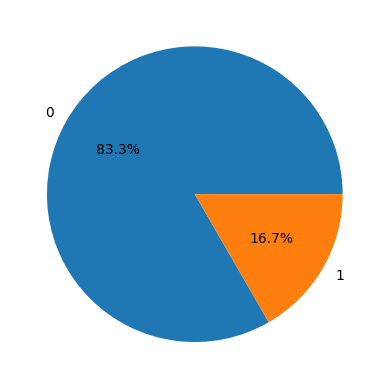

In [84]:
plt.pie(data["target"].value_counts(),autopct="%0.1f%%",labels=[0,1])
plt.show()

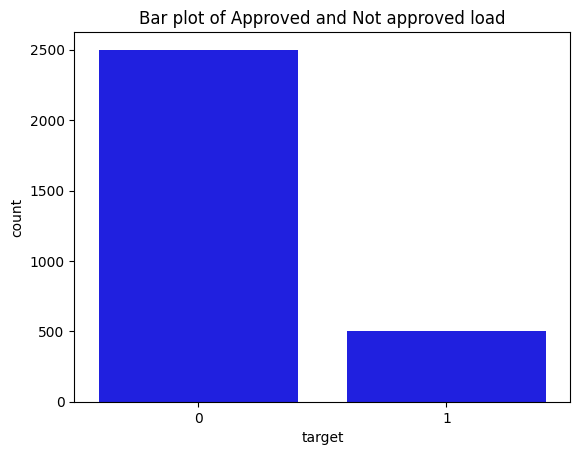

In [94]:
sns.barplot(x=data["target"].value_counts().index, 
            y=data["target"].value_counts(),color="blue")
plt.title("Bar plot of Approved and Not approved load")
plt.show()

In [30]:
x = data.iloc[:,1:]
y = data.iloc[:,0:1]

In [32]:
x.shape,y.shape

((3000, 29), (3000, 1))

In [43]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
2995,0
2996,0
2997,0
2998,0


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

## Logistic Regrression

In [68]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy score is :",accuracy_score(y_test,y_pred))

Accuracy score is : 0.795


In [72]:
lr.predict_proba(x_test)

array([[0.69047822, 0.30952178],
       [0.84158227, 0.15841773],
       [0.77654795, 0.22345205],
       ...,
       [0.78686226, 0.21313774],
       [0.83401771, 0.16598229],
       [0.91227882, 0.08772118]])

## Decision Tree

In [69]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy score is :",accuracy_score(y_test,y_pred))

Accuracy score is : 0.78


# Random Forest Ensemble

In [73]:
rf = RandomForestClassifier(random_state=17,n_estimators=100,max_features="sqrt",max_depth=10)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Accuracy score is :",accuracy_score(y_test,y_pred))

Accuracy score is : 0.815


In [71]:
scores =[]
for i in range(20):
    rf = RandomForestClassifier(random_state=i,n_estimators=100,max_features="sqrt",max_depth=10)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    
np.argmax(scores)

np.int64(17)